In [ ]:
### probabalistic forecasting of next month returns using mcmc 

In [47]:
## loading libraries

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
from scipy.optimize import minimize
import seaborn as sns
import yfinance as yf


In [70]:
## tickers I want to use

tickers = ["DCOR", "VFC", "PEBK", "NZUS", "DB", "OPFI", "FNDF", "VFMV", "ROG", "VIOO"]


In [71]:
## monthly prices

def get_monthly_prices(ticker_list, start="2010-01-01", end="2025-07-01"):
    print(f"Getting data for: {ticker_list}")
    data = yf.download(ticker_list, start=start, end=end, interval="1mo", auto_adjust=True)
    
    if isinstance(data.columns, pd.MultiIndex):
        prices = data.xs("Close", level=0, axis=1)
    else:
        prices = data["Close"].to_frame()  
    
    return prices


prices_df = get_monthly_prices(tickers)

## this gets a time series of the adjusted prices
## adjusted prices account for dividends & stock splits

Getting data for: ['DCOR', 'VFC', 'PEBK', 'NZUS', 'DB', 'OPFI', 'FNDF', 'VFMV', 'ROG', 'VIOO']


[*********************100%***********************]  10 of 10 completed


In [72]:
### monthly returns

## % change calculation
returns_df = prices_df.pct_change().dropna(how="all")

## drop na
returns_df = returns_df.dropna()


In [78]:

def fit_bayesian_return_model(ticker_returns, ticker_name=""):
    with pm.Model() as model:
        # prior for mean return: normally distributed around -0.005, small uncertainty
        expected_return = pm.Normal('expected_return', mu=-0.005, sigma=0.01) 
        # sd can't be negative: low volatility
        return_volatility = pm.HalfNormal('return_volatility', sigma=0.01)  
        # likelihood: actual obs. monthly returns is from normal dist with unknown xReturn & return volatility
        pm.Normal('obs', mu=expected_return, sigma=return_volatility, observed=ticker_returns) 
        # MCMC sampler
        trace = pm.sample(draws=2000, tune=1000, chains=4, target_accept=0.95, return_inferencedata=True) 

    # get posterior for both xReturn and return volatility
    expected_return_samples = trace.posterior['expected_return'].values.flatten()
    return_volatility_samples = trace.posterior['return_volatility'].values.flatten()

    # Simulate next month returns
    simulated_returns = np.random.normal(loc=expected_return_samples, scale=return_volatility_samples)

    # probability of the return being > 0
    prob_positive = np.mean(simulated_returns > 0)

    # Plot distributions
    az.plot_posterior(trace, var_names=["expected_return", "return_volatility"], kind='kde', hdi_prob=0.95)
    plt.suptitle(f"Posterior Distributions for {ticker}", fontsize=14)
    plt.tight_layout()
    plt.show()

    return {
        "trace": trace,
        "prob_positive_return": prob_positive
    }



Initializing NUTS using jitter+adapt_diag...



=== DB ===


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [expected_return, return_volatility]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 13 seconds.


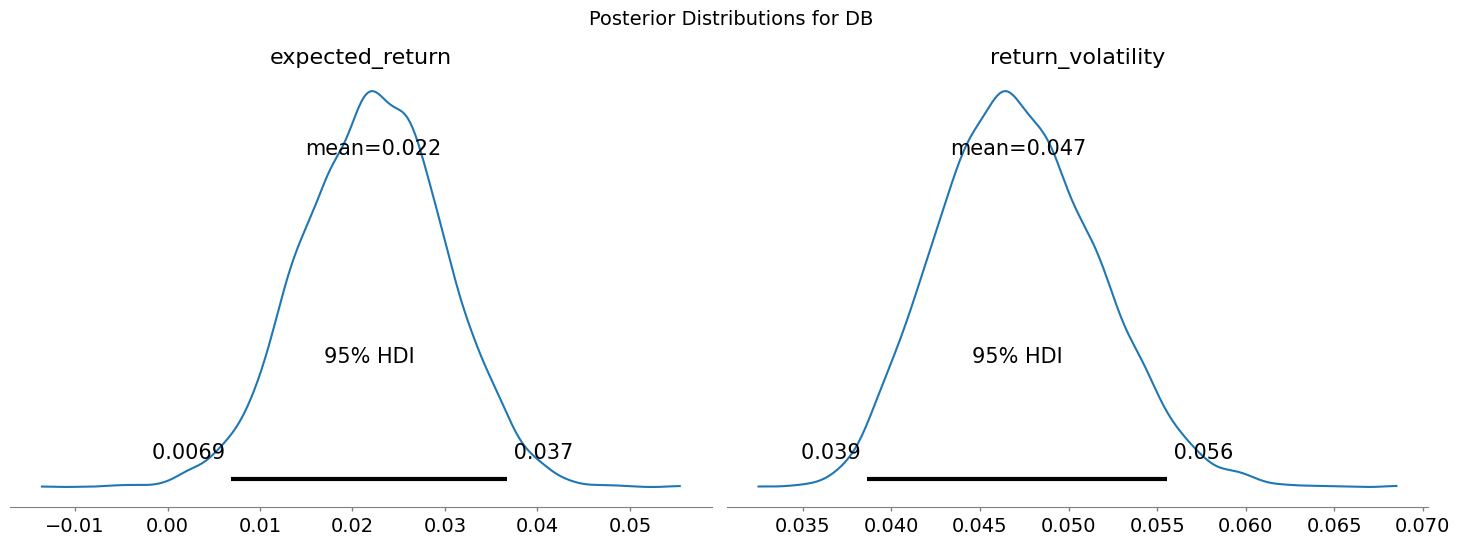

Initializing NUTS using jitter+adapt_diag...



=== DCOR ===


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [expected_return, return_volatility]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 13 seconds.


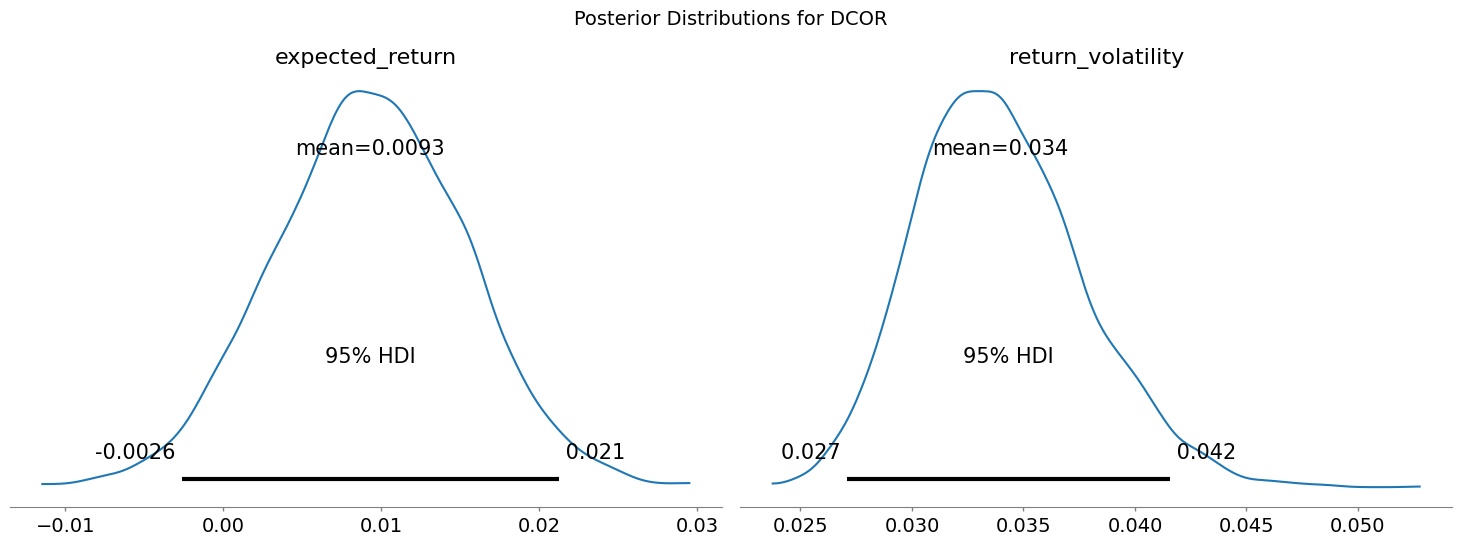

Initializing NUTS using jitter+adapt_diag...



=== FNDF ===


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [expected_return, return_volatility]


Output()

Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.11/3.11.11/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/forkserver.py", line 274, in main
    code = _serve_one(child_r, fds,
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/Cellar/python@3.11/3.11.11/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/forkserver.py", line 313, in _serve_one
    code = spawn._main(child_r, parent_sentinel)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/Cellar/python@3.11/3.11.11/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/spawn.py", line 132, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
_pickle.UnpicklingError: pickle data was truncated


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 13 seconds.


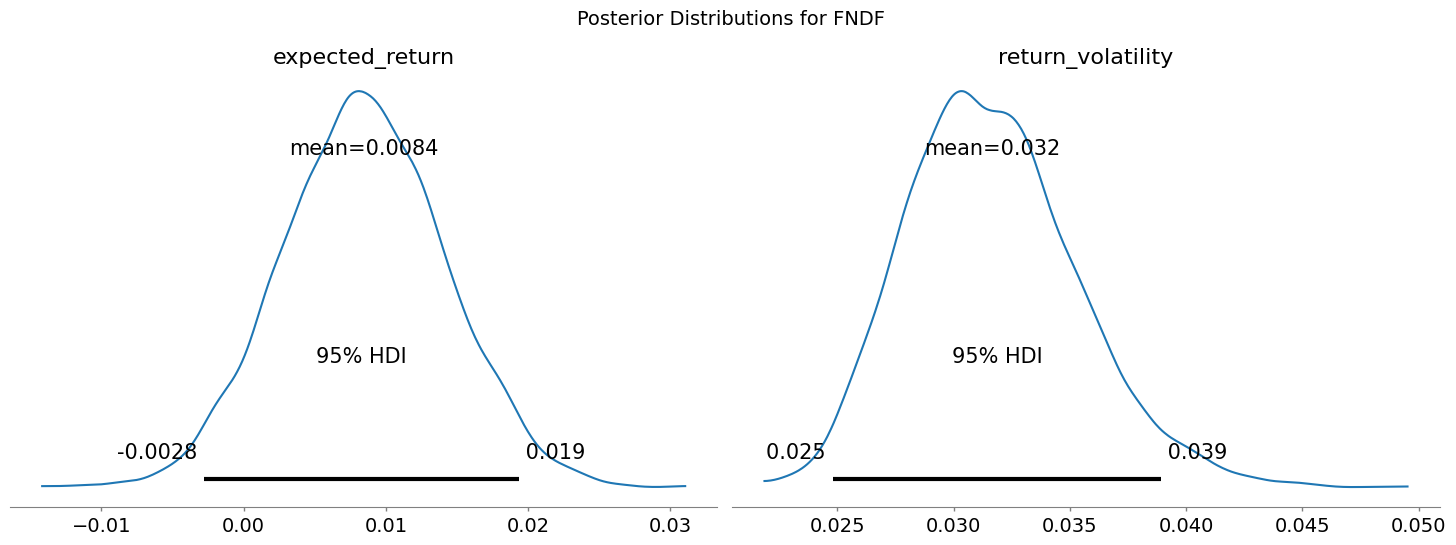

Initializing NUTS using jitter+adapt_diag...



=== NZUS ===


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [expected_return, return_volatility]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 13 seconds.


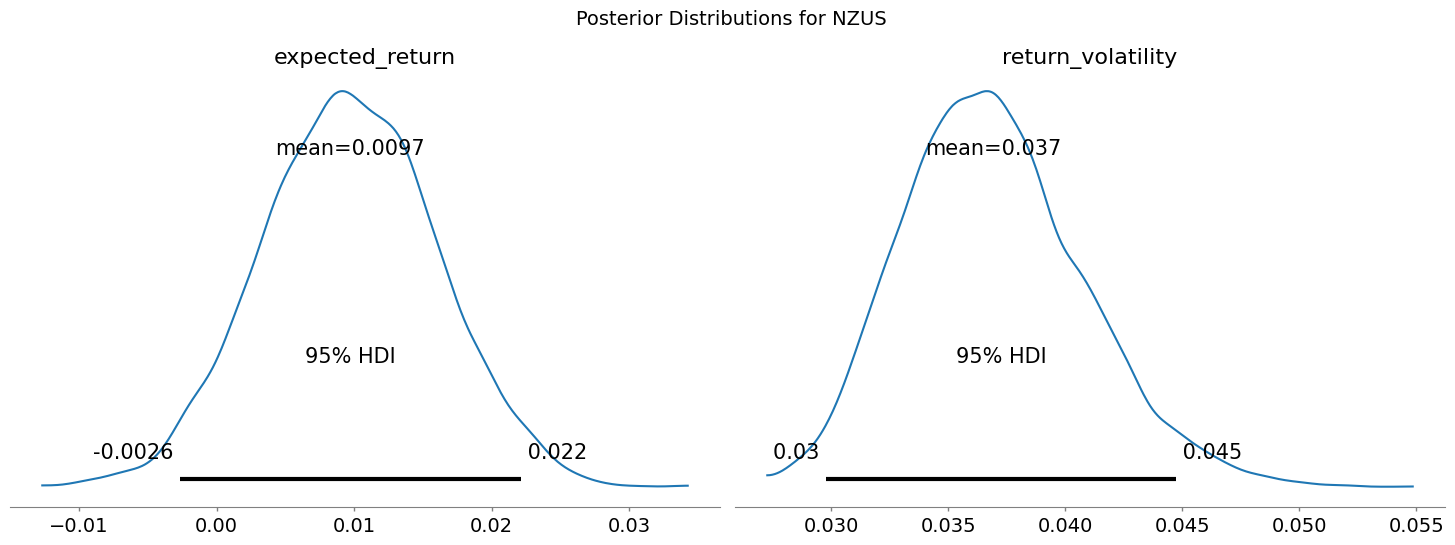

Initializing NUTS using jitter+adapt_diag...



=== OPFI ===


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [expected_return, return_volatility]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 14 seconds.


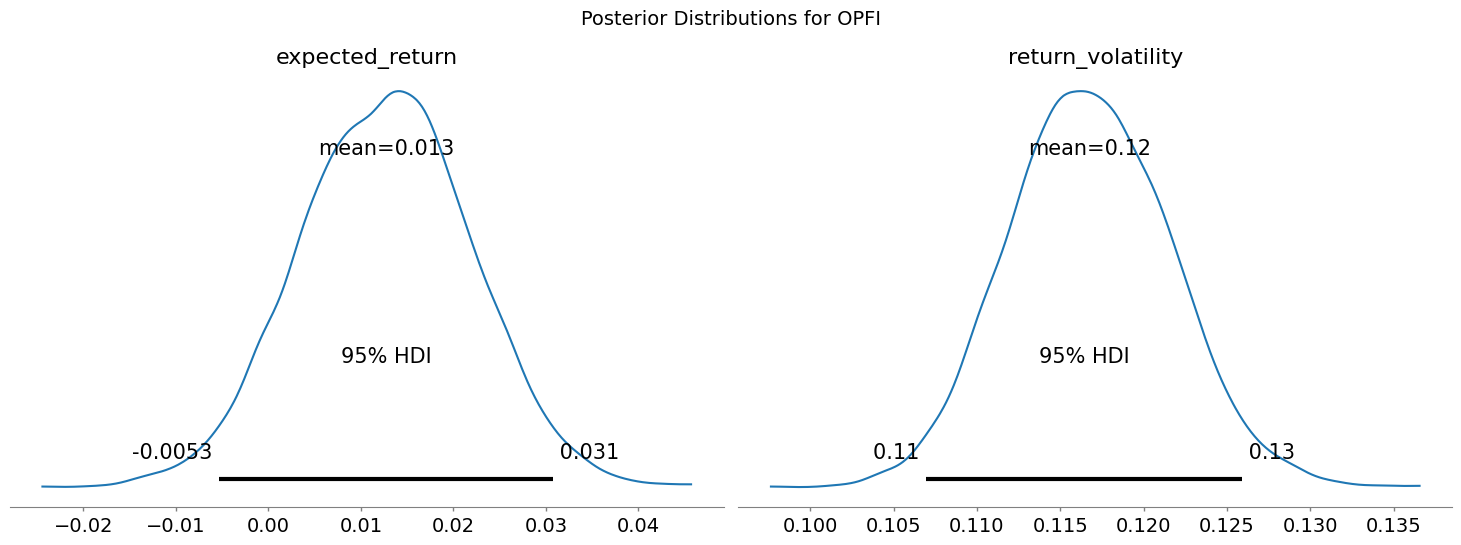

Initializing NUTS using jitter+adapt_diag...



=== PEBK ===


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [expected_return, return_volatility]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 13 seconds.


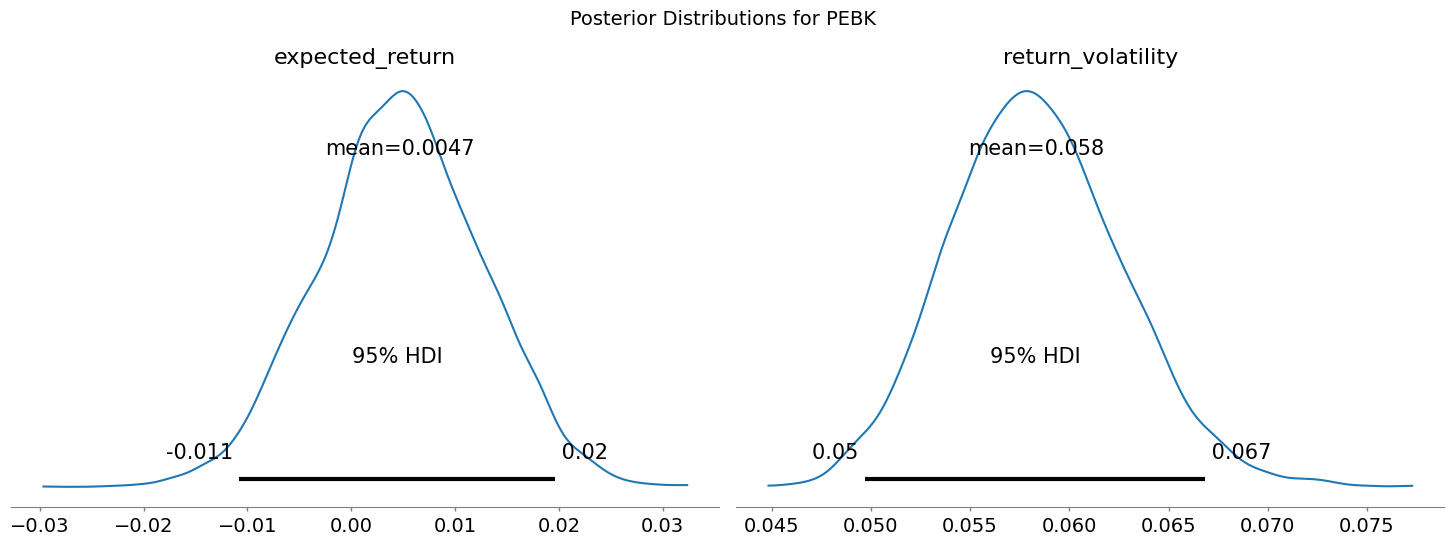

Initializing NUTS using jitter+adapt_diag...



=== ROG ===


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [expected_return, return_volatility]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 14 seconds.


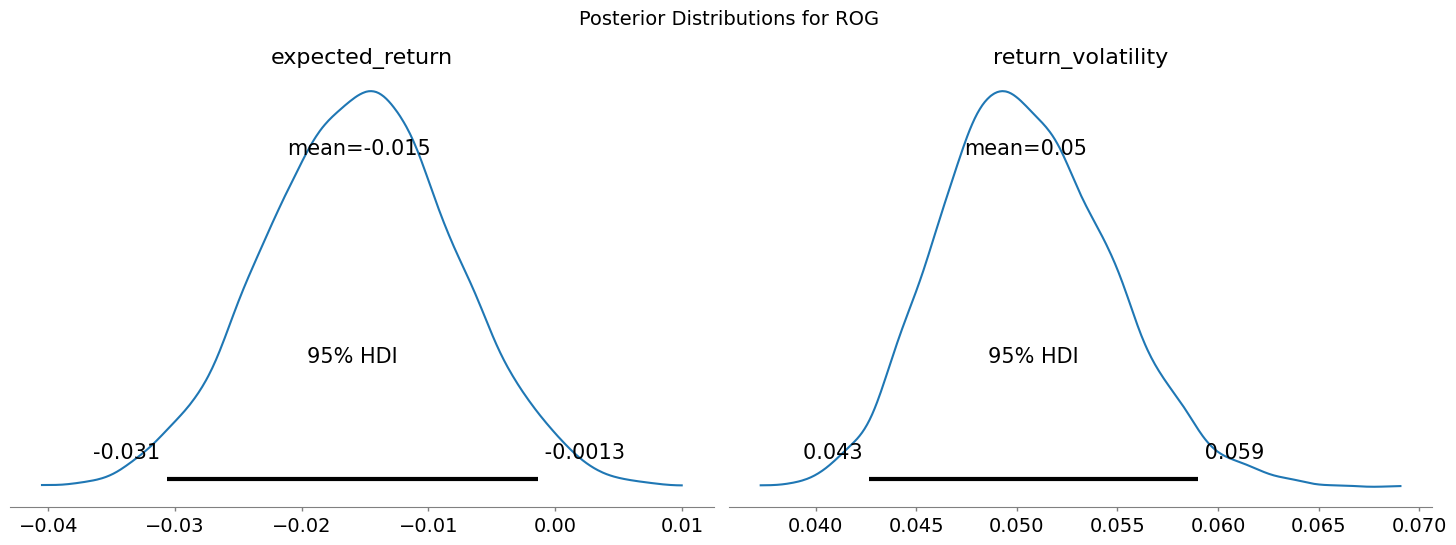

Initializing NUTS using jitter+adapt_diag...



=== VFC ===


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [expected_return, return_volatility]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 13 seconds.


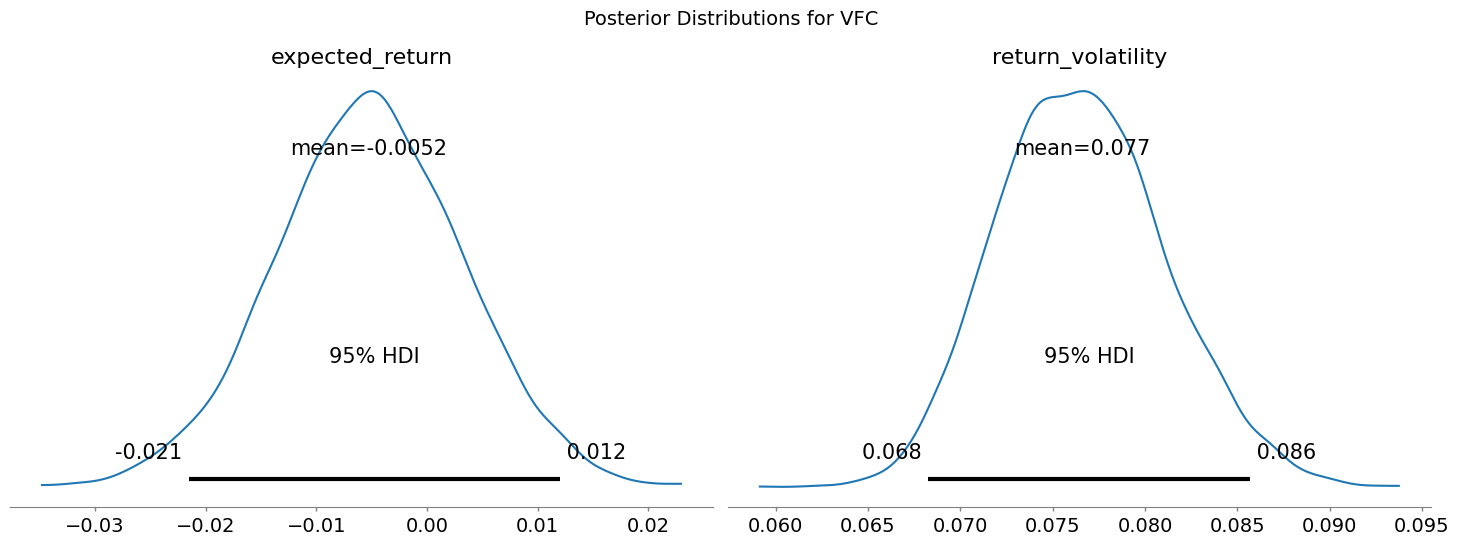

Initializing NUTS using jitter+adapt_diag...



=== VFMV ===


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [expected_return, return_volatility]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 13 seconds.


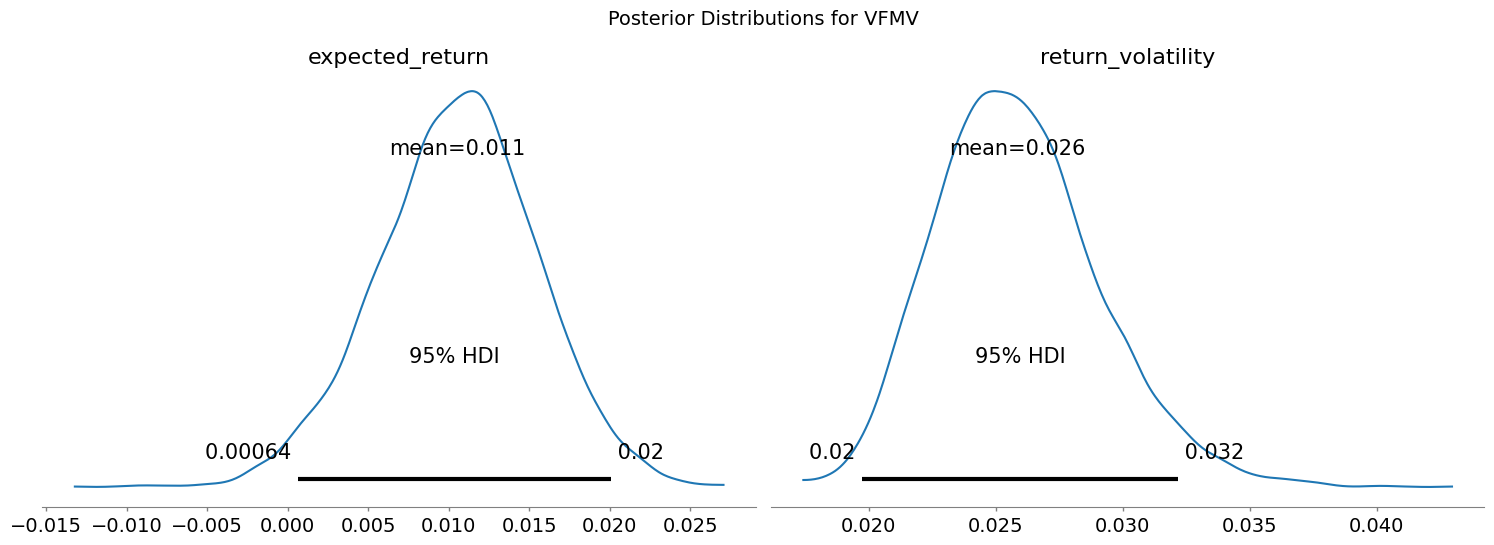

Initializing NUTS using jitter+adapt_diag...



=== VIOO ===


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [expected_return, return_volatility]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 13 seconds.


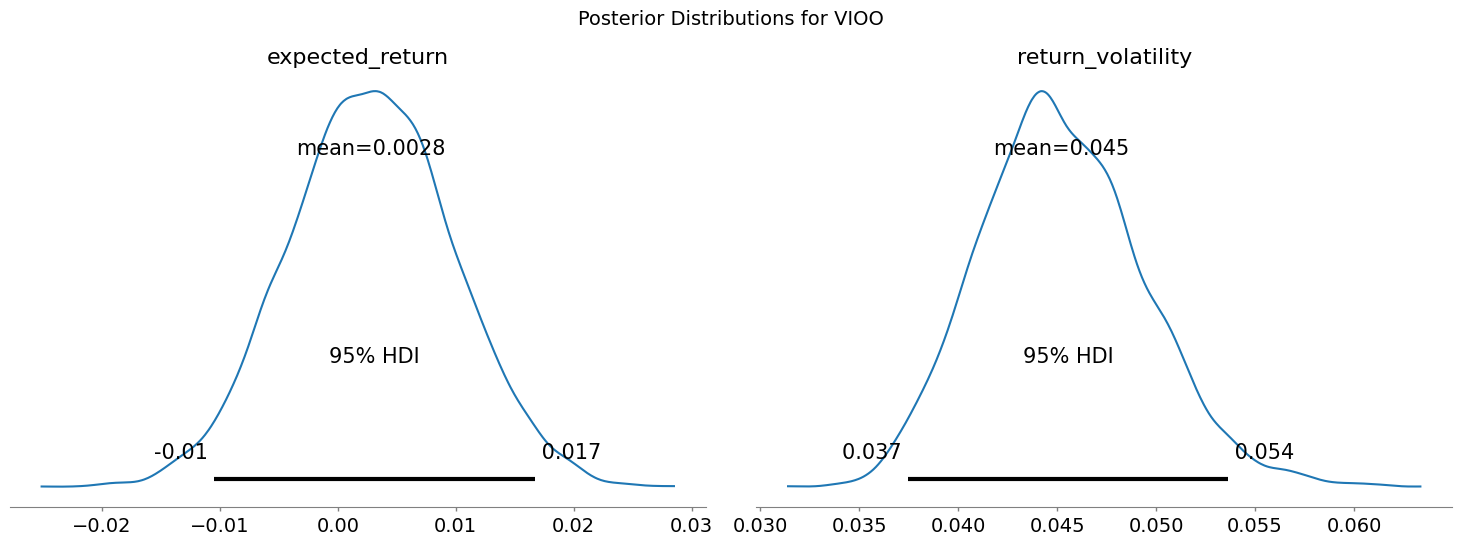

In [79]:
results = {} 

for ticker in returns_df.columns:
    print(f"\n=== {ticker} ===")
    returns = returns_df[ticker].dropna().values
    output = fit_bayesian_return_model(returns)
    results[ticker] = output


In [80]:
## Ranking the outputs by probability of > 0 return

ranking = sorted(
    [(ticker, res['prob_positive_return']) for ticker, res in results.items()],
    key=lambda x: x[1],
    reverse=True
)

print("Ranking of Tickers by P(Return > 0) Next Month:\n")
for rank, (ticker, prob) in enumerate(ranking, start=1):
    print(f"{rank}. {ticker}: {prob:.2%}")


Ranking of Tickers by P(Return > 0) Next Month:

1. DB: 68.83%
2. VFMV: 66.05%
3. DCOR: 61.39%
4. FNDF: 60.90%
5. NZUS: 60.16%
6. OPFI: 54.62%
7. VIOO: 53.12%
8. PEBK: 52.88%
9. VFC: 46.89%
10. ROG: 37.12%
